In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
file_path = 'campeonatos_futebol_atualizacao.csv'
df = pd.read_csv(file_path)

# 1 - Análise Inicial dos Dados

Nesta etapa, realizamos uma análise exploratória dos dados com o objetivo de compreender melhor as variáveis disponíveis, identificar possíveis problemas (como valores ausentes ou inconsistências) e organizar as etapas de tratamento que seriam realizadas.

As ações tomadas incluíram:

- **Visualização das primeiras linhas do dataset** (`df.head()`) para ter uma ideia geral da estrutura dos dados.
- **Informações sobre os tipos de dados e presença de valores nulos** (`df.info()` e `df.isnull().mean()`), possibilitando identificar variáveis com muitos valores faltantes.
- **Análise da distribuição das variáveis numéricas** por meio de histogramas, permitindo observar a dispersão, presença de outliers e assimetrias.
- **Boxplots** foram utilizados para destacar visualmente possíveis outliers e variações entre as variáveis numéricas.

Essa análise preliminar foi fundamental para guiar o processo de tratamento de dados e para dividir as tarefas entre os membros do grupo de forma eficiente e estratégica.

In [3]:
df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       26204 non-null  float64
 1   Chutes a gol 2       26204 non-null  float64
 2   Impedimentos 1       24942 non-null  float64
 3   Impedimentos 2       24942 non-null  float64
 4   Escanteios 1         25388 non-null  float64
 5   Escanteios 2         25388 non-null  float64
 6   Chutes fora 1        25392 non-null  float64
 7   Chutes fora 2        25392 non-null  float64
 8   Faltas 1             25394 non-null  float64
 9   Faltas 2             25394 non-null  float64
 10  Cartões amarelos 1   27716 non-null  float64
 11  Cartões amarelos 2   27716 non-null  float64
 12  Cartões vermelhos 1  27716 non-null  float64
 13  Cartões vermelhos 2  27716 non-null  float64
 14  Cruzamentos 1        9015 non-null   float64
 15  Cruzamentos 2        9015 non-null  

In [5]:
df.isnull().mean().sort_values(ascending=False)

Tratamentos 2          0.818913
Tratamentos 1          0.818913
Defesas difíceis 2     0.776447
Defesas difíceis 1     0.776447
Tiros-livres 1         0.774643
Tiros-livres 2         0.774643
Contra-ataques 2       0.774029
Contra-ataques 1       0.774029
Chutes bloqueados 1    0.680942
Chutes bloqueados 2    0.680942
Cruzamentos 2          0.674737
Cruzamentos 1          0.674737
Substituições 1        0.660124
Substituições 2        0.660124
Tiro de meta 1         0.566496
Tiro de meta 2         0.566496
Laterais 1             0.452771
Laterais 2             0.452771
Impedimentos 2         0.100087
Impedimentos 1         0.100087
Posse 1(%)             0.084789
Posse 2(%)             0.084789
Escanteios 2           0.083995
Escanteios 1           0.083995
Chutes fora 2          0.083850
Chutes fora 1          0.083850
Faltas 2               0.083778
Faltas 1               0.083778
Position 2             0.058811
Position 1             0.057801
Chutes a gol 2         0.054553
Chutes a

<Figure size 1500x1000 with 0 Axes>

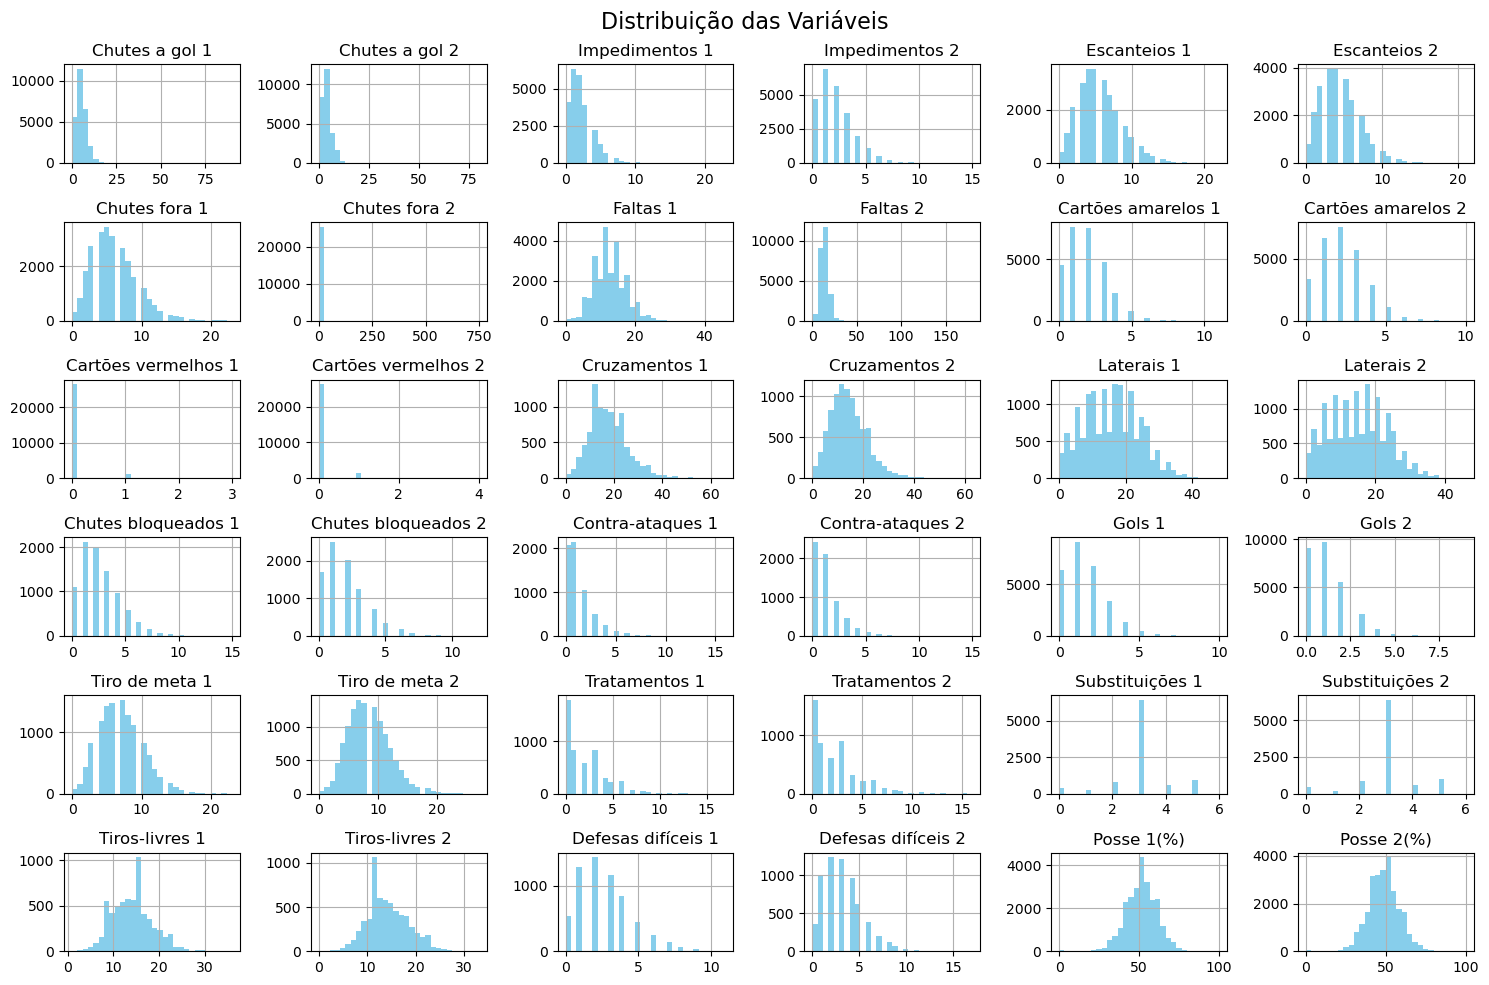

In [6]:
# Distribuição das Variáveis
plt.figure(figsize=(15, 10))
df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribuição das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

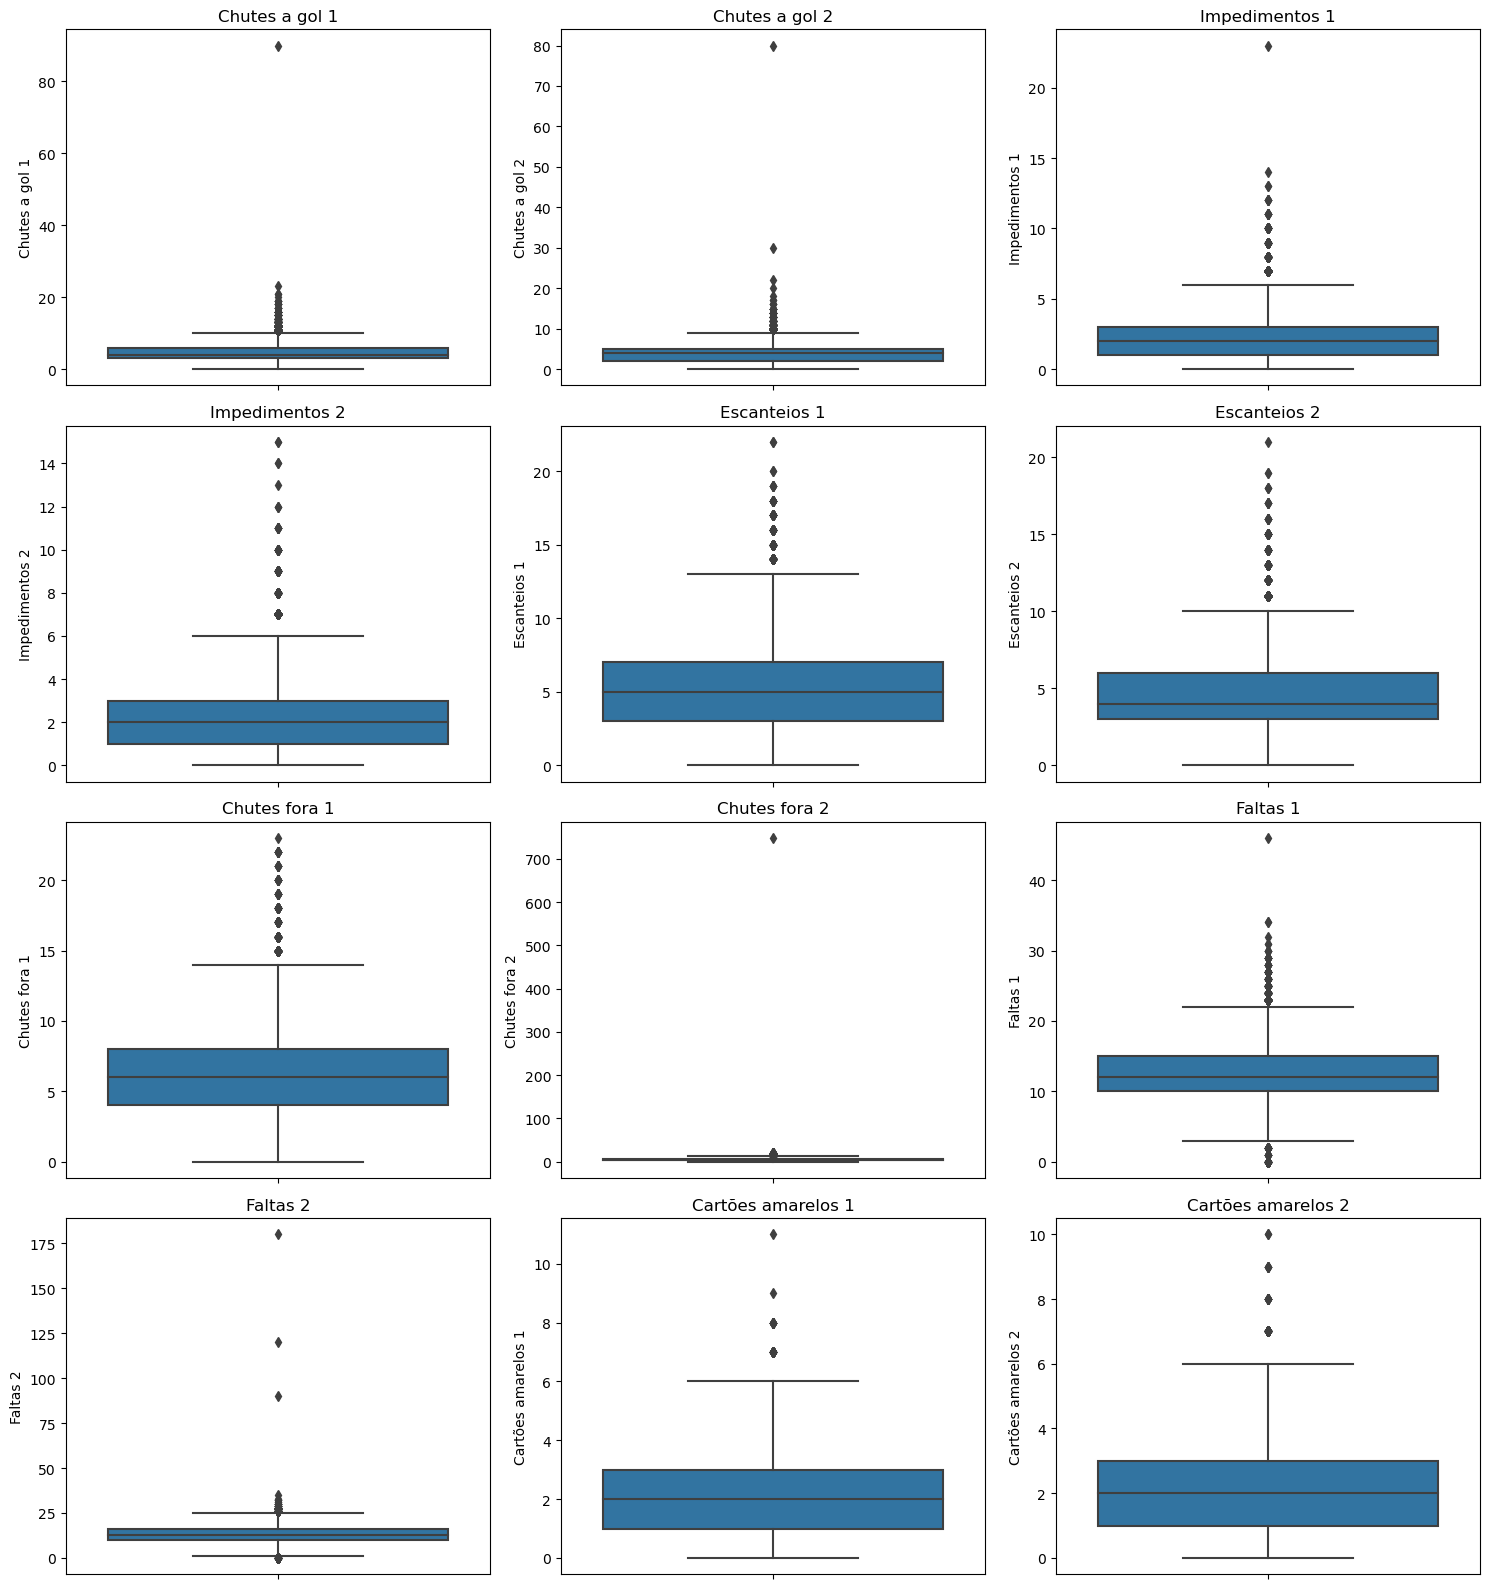

In [7]:
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 16))
axes = axes.flatten()

for i, col in enumerate(colunas_numericas[:12]):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

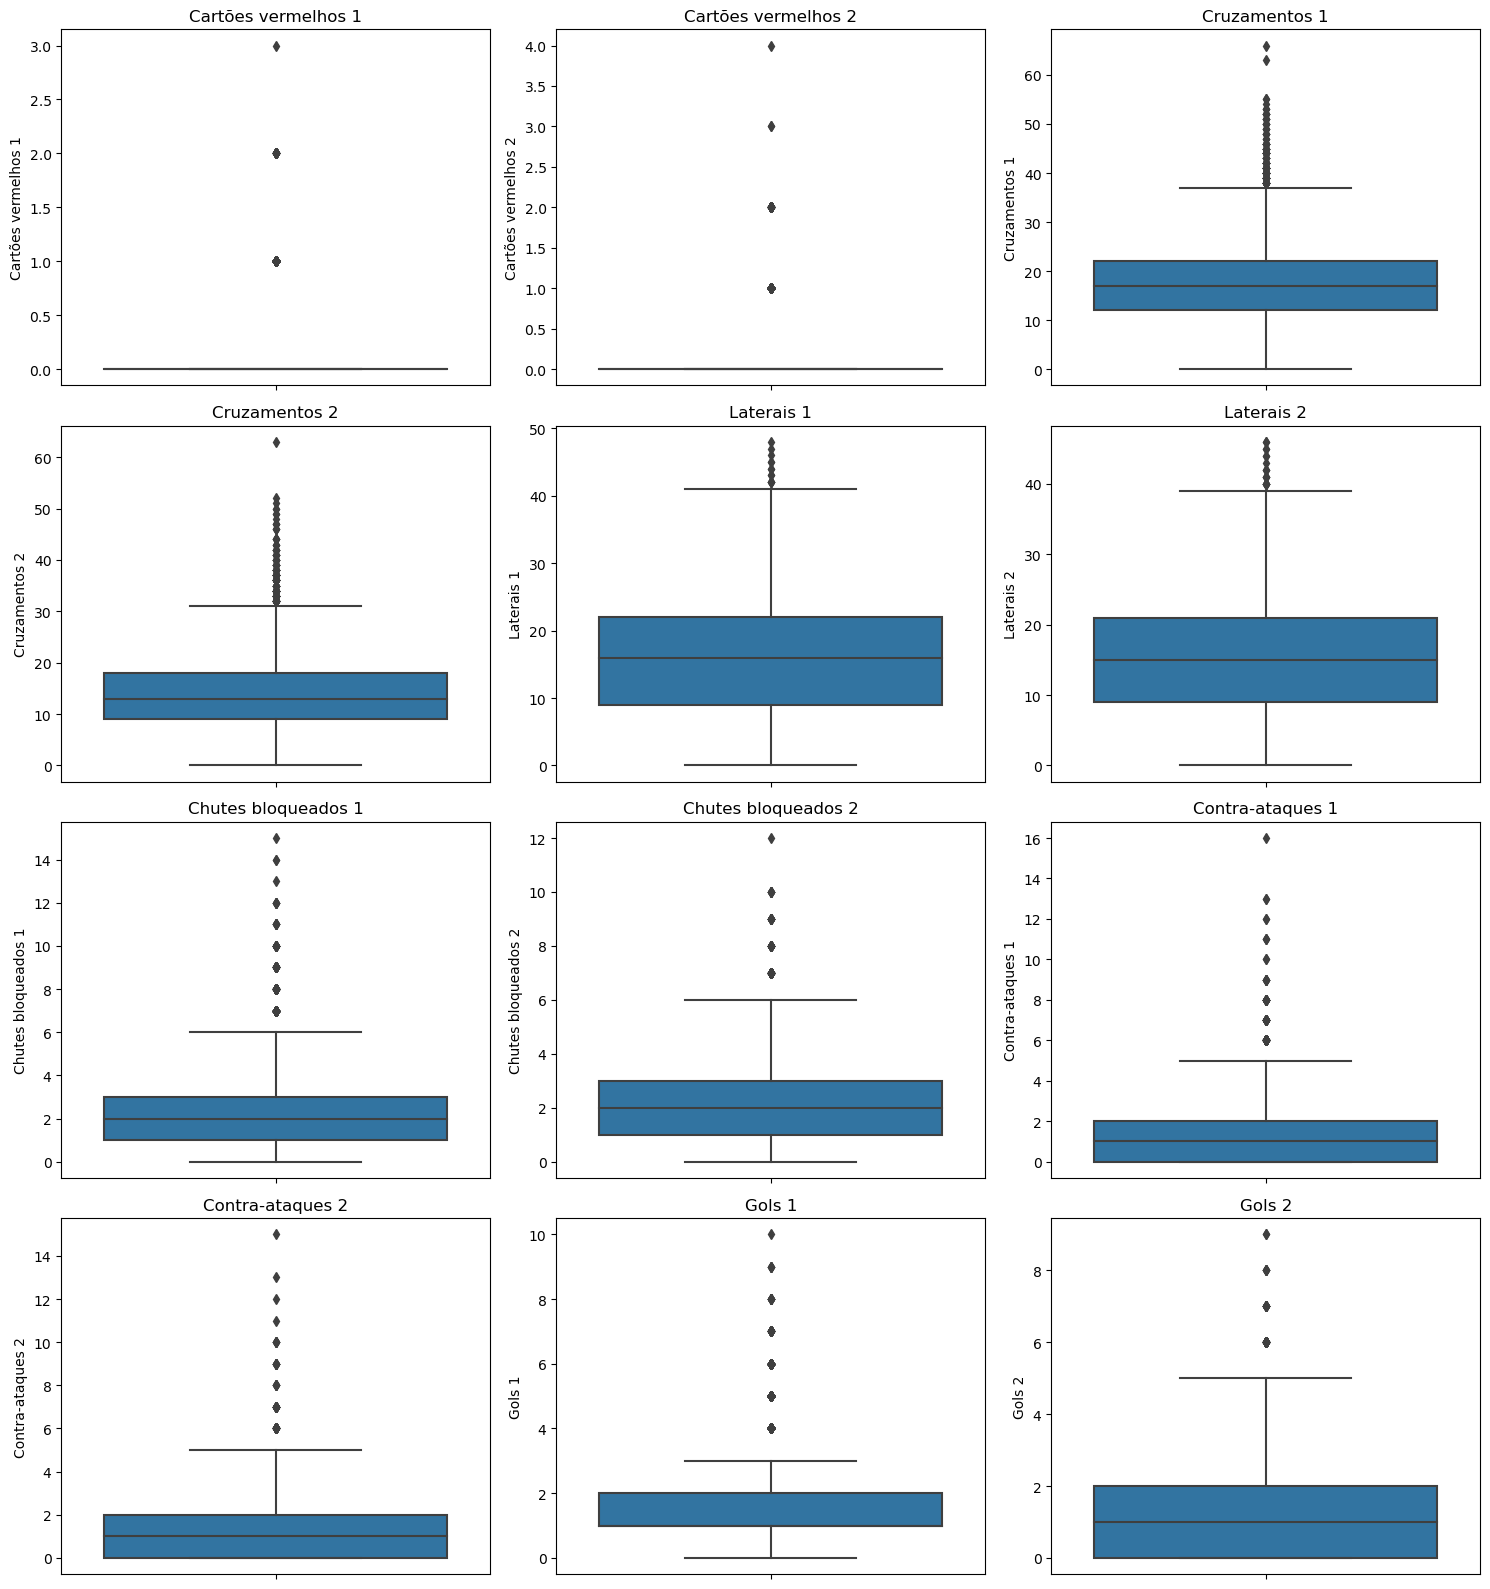

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 16))
axes = axes.flatten()

for i, col in enumerate(colunas_numericas[12:24]):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()


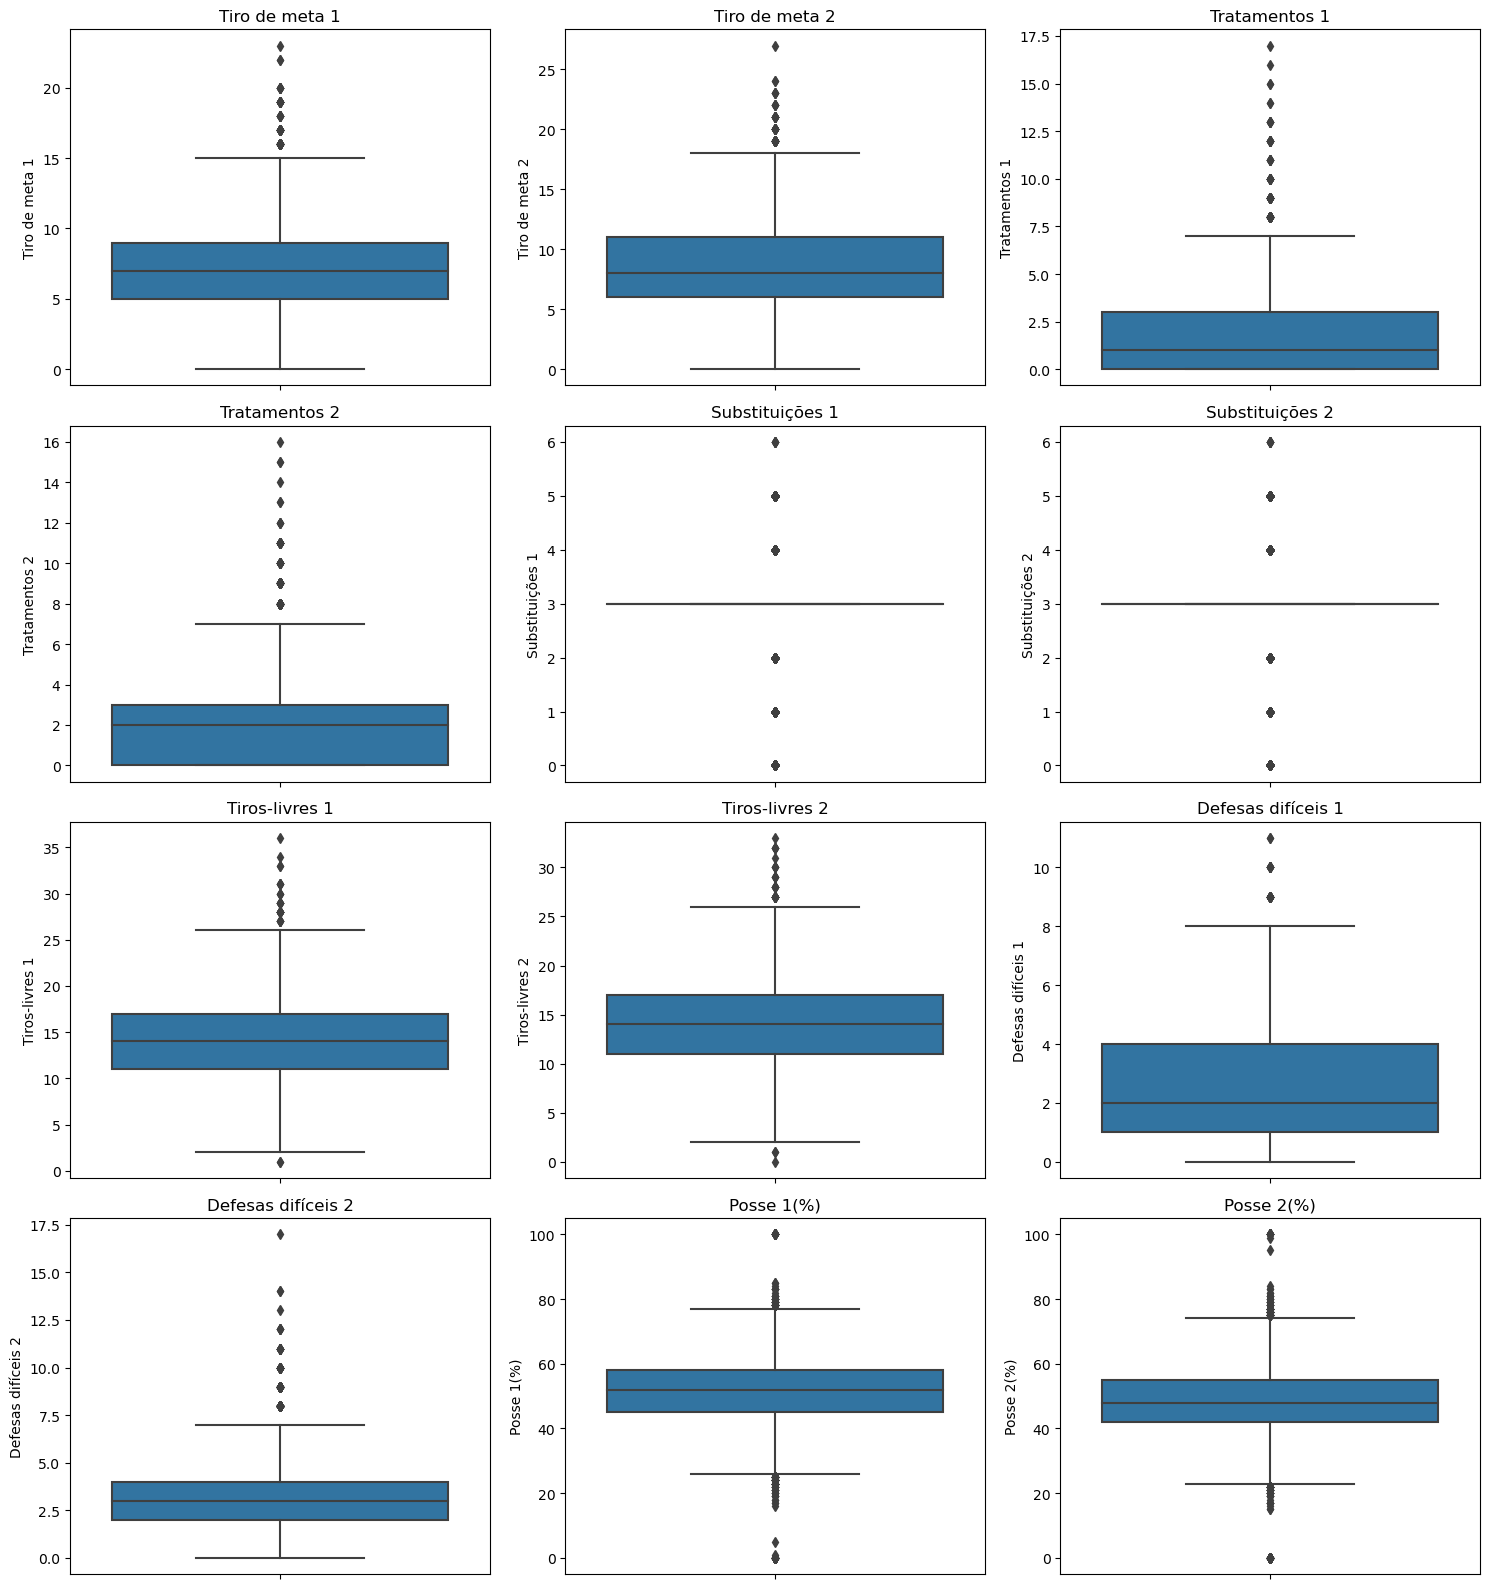

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 16))
axes = axes.flatten()

for i, col in enumerate(colunas_numericas[24:]):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)

# Se tiver menos de 12 colunas nesta parte, apaga os gráficos sobrando
for j in range(len(colunas_numericas[24:]), 12):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


# 2 - Tiro de Meta

No contexto do futebol, o tiro de meta acontece quando a bola ultrapassa a linha de fundo após o último toque de um jogador da equipe adversária, resultando em uma reposição de bola feita pelo goleiro, geralmente com um chute longo.

Com base nessa lógica, é razoável supor que a ocorrência de tiros de meta possa estar relacionada à quantidade de **chutes que vão para fora do gol**. Por isso, nesta etapa, buscamos investigar a correlação entre a variável **"Tiro de Meta"** e a variável **"Chutes Fora"**, avaliando se existe uma associação que possa indicar esse padrão de jogo.

In [10]:
df[['Chutes fora 2', 'Tiro de meta 1','Chutes fora 1', 'Tiro de meta 2']].describe()

,Chutes fora 2,Tiro de meta 1,Chutes fora 1,Tiro de meta 2
count,25392.000000,12015.000000,25392.000000,12015.000000
mean,4.956758,7.061257,6.034302,8.371369
std,5.451316,3.188059,3.224260,3.528228
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,6.000000
50%,5.000000,7.000000,6.000000,8.000000
75%,7.000000,9.000000,8.000000,11.000000
max,748.000000,23.000000,23.000000,27.000000


Tem um outlier grande em 'Chutes fora 2'. Por isso vamos fazer um ajuste.

In [11]:
df['Chutes fora 2'].value_counts(dropna=False).sort_index()

0.0       558
1.0      1587
2.0      2812
3.0      3723
4.0      3846
5.0      3520
6.0      2914
7.0      2166
8.0      1525
9.0      1004
10.0      674
11.0      453
12.0      253
13.0      151
14.0       87
15.0       56
16.0       23
17.0       12
18.0       10
19.0        8
20.0        5
21.0        4
748.0       1
NaN      2324
Name: Chutes fora 2, dtype: int64

In [12]:
df = df[df['Chutes fora 2'] != 748]

In [13]:
df[['Chutes fora 2', 'Tiro de meta 1','Chutes fora 1', 'Tiro de meta 2']].describe()

,Chutes fora 2,Tiro de meta 1,Chutes fora 1,Tiro de meta 2
count,25391.000000,12015.000000,25391.000000,12015.000000
mean,4.927494,7.061257,6.034264,8.371369
std,2.823448,3.188059,3.224318,3.528228
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,6.000000
50%,5.000000,7.000000,6.000000,8.000000
75%,7.000000,9.000000,8.000000,11.000000
max,21.000000,23.000000,23.000000,27.000000


In [14]:
df[['Chutes fora 1', 'Tiro de meta 2']].corr()

,Chutes fora 1,Tiro de meta 2
Chutes fora 1,1.000000,0.701089
Tiro de meta 2,0.701089,1.000000


In [15]:
df[['Chutes fora 2', 'Tiro de meta 1']].corr()

,Chutes fora 2,Tiro de meta 1
Chutes fora 2,1.000000,0.679176
Tiro de meta 1,0.679176,1.000000


Isso indica uma forte relação linear positiva, o que torna regressão linear simples uma escolha super válida pra imputar os valores faltantes com boa confiança.

In [16]:
# Regressão para Tiro de meta 1 a partir de Chutes fora 2
mask = df['Tiro de meta 1'].notna() & df['Chutes fora 2'].notna()
X = df.loc[mask, ['Chutes fora 2']]
y = df.loc[mask, 'Tiro de meta 1']

model_1 = LinearRegression()
model_1.fit(X, y)

# Prevendo os valores faltantes
missing_mask = df['Tiro de meta 1'].isna() & df['Chutes fora 2'].notna()
df.loc[missing_mask, 'Tiro de meta 1'] = model_1.predict(df.loc[missing_mask, ['Chutes fora 2']])

In [17]:
# Regressão: Tiro de meta 2 ~ Chutes fora 1
mask = df['Tiro de meta 2'].notna() & df['Chutes fora 1'].notna()
X = df.loc[mask, ['Chutes fora 1']]
y = df.loc[mask, 'Tiro de meta 2']

model_2 = LinearRegression()
model_2.fit(X, y)

# Imputando os valores nulos de Tiro de meta 2
mask_na = df['Tiro de meta 2'].isna() & df['Chutes fora 1'].notna()
df.loc[mask_na, 'Tiro de meta 2'] = model_2.predict(df.loc[mask_na, ['Chutes fora 1']])

In [18]:
df[['Chutes fora 2', 'Tiro de meta 1','Chutes fora 1', 'Tiro de meta 2']].describe()

,Chutes fora 2,Tiro de meta 1,Chutes fora 1,Tiro de meta 2
count,25391.000000,25405.000000,25391.000000,25405.000000
mean,4.927494,7.562287,6.034264,8.964447
std,2.823448,2.980823,3.224318,3.332612
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.853600,4.000000,7.000000
50%,5.000000,7.000000,6.000000,8.936981
75%,7.000000,9.406053,8.000000,11.000000
max,21.000000,23.000000,23.000000,27.000000


In [19]:
df.isnull().mean().sort_values(ascending=False)

Tratamentos 2          0.818907
Tratamentos 1          0.818907
Defesas difíceis 2     0.776439
Defesas difíceis 1     0.776439
Tiros-livres 1         0.774635
Tiros-livres 2         0.774635
Contra-ataques 2       0.774021
Contra-ataques 1       0.774021
Chutes bloqueados 1    0.680931
Chutes bloqueados 2    0.680931
Cruzamentos 2          0.674725
Cruzamentos 1          0.674725
Substituições 1        0.660112
Substituições 2        0.660112
Laterais 1             0.452751
Laterais 2             0.452751
Impedimentos 2         0.100090
Impedimentos 1         0.100090
Posse 1(%)             0.084792
Posse 2(%)             0.084792
Escanteios 2           0.083998
Escanteios 1           0.083998
Chutes fora 2          0.083854
Chutes fora 1          0.083854
Faltas 2               0.083781
Faltas 1               0.083781
Tiro de meta 1         0.083348
Tiro de meta 2         0.083348
Position 2             0.058813
Position 1             0.057803
Chutes a gol 2         0.054555
Chutes a

# 3 - Tiro Livre

O tiro livre é a cobrança realizada após a marcação de uma falta ou impedimento. Como nosso conjunto de dados possui uma quantidade significativa de informações sobre **faltas cometidas** e **impedimentos**, é possível explorar essas variáveis como base para a **imputação dos valores ausentes na variável "Tiro Livre"**.

A ideia aqui é aproveitar a relação direta entre essas ocorrências para estimar os valores faltantes de forma coerente com a lógica do jogo.

In [20]:
df[['Faltas 1', 'Impedimentos 1', 'Tiros-livres 2']].corr()

,Faltas 1,Impedimentos 1,Tiros-livres 2
Faltas 1,1.000000,0.018256,0.925316
Impedimentos 1,0.018256,1.000000,0.363841
Tiros-livres 2,0.925316,0.363841,1.000000


In [21]:
df[['Faltas 2', 'Impedimentos 2', 'Tiros-livres 1']].corr()

,Faltas 2,Impedimentos 2,Tiros-livres 1
Faltas 2,1.000000,0.035065,0.934033
Impedimentos 2,0.035065,1.000000,0.362348
Tiros-livres 1,0.934033,0.362348,1.000000


Novamente uma alta correlação entre eles.

In [22]:
df[['Faltas 1', 'Impedimentos 1', 'Tiros-livres 2','Faltas 2', 'Impedimentos 2', 'Tiros-livres 1']].describe()

,Faltas 1,Impedimentos 1,Tiros-livres 2,Faltas 2,Impedimentos 2,Tiros-livres 1
count,25393.000000,24941.000000,6246.000000,25393.000000,24941.000000,6246.000000
mean,12.694128,2.139770,14.245757,12.946442,1.968526,14.156260
std,4.337094,1.754919,4.335781,4.608632,1.681332,4.432963
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10.000000,1.000000,11.000000,10.000000,1.000000,11.000000
50%,12.000000,2.000000,14.000000,13.000000,2.000000,14.000000
75%,15.000000,3.000000,17.000000,16.000000,3.000000,17.000000
max,46.000000,23.000000,33.000000,180.000000,15.000000,36.000000


Aqui encontramos um outlier em 'Faltas 2' vamos aprofundar e ver do que se trata.

In [23]:
df['Faltas 2'].value_counts(dropna=False).sort_index()

0.0        75
1.0        22
2.0        33
3.0        94
4.0       190
5.0       399
6.0       688
7.0       982
8.0      1395
9.0      1720
10.0     2092
11.0     2222
12.0     2386
13.0     2314
14.0     2102
15.0     1912
16.0     1608
17.0     1406
18.0     1062
19.0      802
20.0      599
21.0      399
22.0      293
23.0      213
24.0      145
25.0       99
26.0       62
27.0       29
28.0       23
29.0       10
30.0        7
31.0        2
32.0        3
33.0        1
35.0        1
90.0        1
120.0       1
180.0       1
NaN      2322
Name: Faltas 2, dtype: int64

Nessa caso aparecem quantidade de faltas acima de 30, que seria bem incomum em uma partida de futebol para um time, mas ainda assim possível. Entretanto 90, 120 e 180 faltas em uma partida parecem valores irreais. Dessa forma eles serão removidos.

In [24]:
# Remover valores fora do intervalo esperado
df = df[df['Faltas 2'] <= 36]

In [25]:
df[['Faltas 1', 'Impedimentos 1', 'Tiros-livres 2','Faltas 2', 'Impedimentos 2', 'Tiros-livres 1']].describe()

,Faltas 1,Impedimentos 1,Tiros-livres 2,Faltas 2,Impedimentos 2,Tiros-livres 1
count,25390.000000,24918.000000,6246.000000,25390.000000,24918.000000,6246.000000
mean,12.694328,2.140982,14.245757,12.932611,1.969420,14.156260
std,4.337302,1.754826,4.335781,4.411053,1.681277,4.432963
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10.000000,1.000000,11.000000,10.000000,1.000000,11.000000
50%,12.000000,2.000000,14.000000,13.000000,2.000000,14.000000
75%,15.000000,3.000000,17.000000,16.000000,3.000000,17.000000
max,46.000000,23.000000,33.000000,35.000000,15.000000,36.000000


## 3.1 - Tiros-livres 1

In [26]:
mask_tl1 = df[['Faltas 2', 'Impedimentos 2', 'Tiros-livres 1']].notna().all(axis=1)


# Depois, calcula a diferença entre Chutes a gol e (Gols + Defesas difíceis)
df_tl1 = df[mask_tl1].copy()
df_tl1['Diff'] = df_tl1['Tiros-livres 1'] - (df_tl1['Impedimentos 2'] + df_tl1['Faltas 2'])

# Ver estatísticas dessa diferença
df_tl1['Diff'].describe()

count    5993.000000
mean        0.000334
std         0.139137
min        -2.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Diff, dtype: float64

In [27]:
df_tl1['Diff'].value_counts().sort_index()

-2.0       1
-1.0      37
 0.0    5924
 1.0      26
 2.0       2
 3.0       1
 4.0       2
Name: Diff, dtype: int64

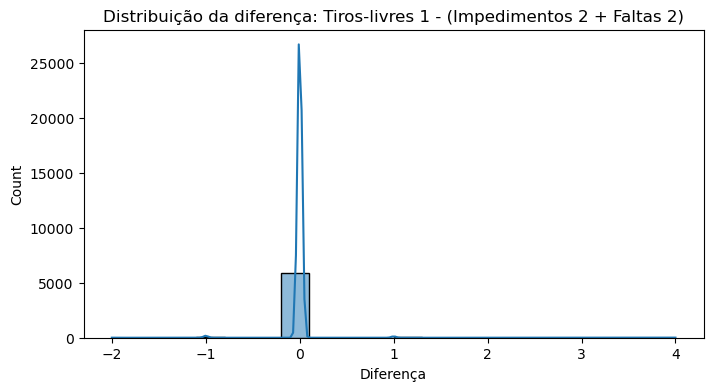

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(df_tl1['Diff'], bins=20, kde=True)
plt.title('Distribuição da diferença: Tiros-livres 1 - (Impedimentos 2 + Faltas 2)')
plt.xlabel('Diferença')
plt.show()

## 3.2 - Tiros-livres 2

In [29]:
mask_tl2 = df[['Faltas 1', 'Impedimentos 1', 'Tiros-livres 2']].notna().all(axis=1)


# Depois, calcula a diferença entre Chutes a gol e (Gols + Defesas difíceis)
df_tl2 = df[mask_tl2].copy()
df_tl2['Diff'] = df_tl2['Tiros-livres 2'] - (df_tl2['Impedimentos 1'] + df_tl2['Faltas 1'])

# Ver estatísticas dessa diferença
df_tl2['Diff'].describe()

count    5993.000000
mean       -0.000834
std         0.153397
min        -7.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Diff, dtype: float64

In [30]:
df_tl2['Diff'].value_counts().sort_index()

-7.0       1
-4.0       1
-2.0       1
-1.0      26
 0.0    5936
 1.0      22
 2.0       6
Name: Diff, dtype: int64

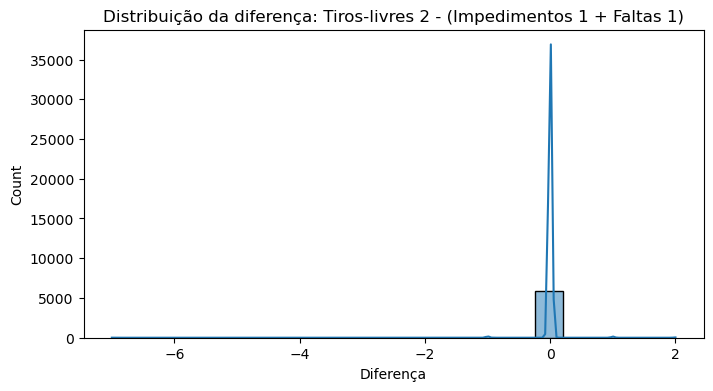

In [31]:
plt.figure(figsize=(8, 4))
sns.histplot(df_tl2['Diff'], bins=20, kde=True)
plt.title('Distribuição da diferença: Tiros-livres 2 - (Impedimentos 1 + Faltas 1)')
plt.xlabel('Diferença')
plt.show()

Os resultados obtidos indicam que a lógica **"Chutes a gol ≈ Gols + Defesas difíceis"** se confirma na ampla maioria dos casos analisados.

- Em **mais de 90% das partidas**, a igualdade **Chutes a gol = Gols + Defesas difíceis** é exata.
- Desvios de até **±1** representam cerca de **5% das partidas**, o que é perfeitamente aceitável.
- Casos com desvios maiores, como **±3 ou mais**, são extremamente raros, ocorrendo em **menos de 1%** dos jogos.

Esses achados reforçam a consistência das variáveis e validam a possibilidade de utilizar essa relação como base para tratamentos ou verificações cruzadas dos dados.

In [32]:
# Imputando Tiros-livres 1
mask_1 = (
    df['Tiros-livres 1'].isna() &
    df['Impedimentos 2'].notna() &
    df['Faltas 2'].notna()
)
df.loc[mask_1, 'Tiros-livres 1'] = df.loc[mask_1, 'Impedimentos 2'] + df.loc[mask_1, 'Faltas 2']

# Imputando Tiros-livres 2
mask_2 = (
    df['Tiros-livres 2'].isna() &
    df['Impedimentos 1'].notna() &
    df['Faltas 1'].notna()
)
df.loc[mask_2, 'Tiros-livres 2'] = df.loc[mask_2, 'Impedimentos 1'] + df.loc[mask_2, 'Faltas 1']

In [33]:
df['Tiros-livres 1'].value_counts().sort_index()

0.0       50
1.0        9
2.0       14
3.0       41
4.0       74
5.0      178
6.0      319
7.0      521
8.0      796
9.0     1069
10.0    1406
11.0    1642
12.0    1931
13.0    2141
14.0    2147
15.0    2091
16.0    1942
17.0    1775
18.0    1591
19.0    1252
20.0    1125
21.0     849
22.0     643
23.0     446
24.0     348
25.0     247
26.0     192
27.0     104
28.0      88
29.0      59
30.0      41
31.0      18
32.0      11
33.0       5
34.0       2
35.0       1
36.0       2
37.0       1
Name: Tiros-livres 1, dtype: int64

In [34]:
df['Tiros-livres 2'].value_counts().sort_index()

0.0       42
1.0        9
2.0       19
3.0       32
4.0       57
5.0      144
6.0      316
7.0      478
8.0      813
9.0     1189
10.0    1425
11.0    1616
12.0    1996
13.0    2131
14.0    2200
15.0    2178
16.0    1970
17.0    1774
18.0    1529
19.0    1317
20.0    1025
21.0     817
22.0     603
23.0     439
24.0     354
25.0     229
26.0     161
27.0     101
28.0      77
29.0      50
30.0      33
31.0      15
32.0      18
33.0       5
34.0       3
35.0       2
36.0       1
37.0       1
46.0       1
47.0       1
Name: Tiros-livres 2, dtype: int64

In [35]:
df[['Tiros-livres 1', 'Tiros-livres 2']].describe()

,Tiros-livres 1,Tiros-livres 2
count,25171.000000,25171.000000
mean,14.892972,14.826825
std,4.778435,4.701854
min,0.000000,0.000000
25%,12.000000,12.000000
50%,15.000000,15.000000
75%,18.000000,18.000000
max,37.000000,47.000000


In [36]:
df.isnull().mean().sort_values(ascending=False)

Tratamentos 2          0.802757
Tratamentos 1          0.802757
Defesas difíceis 2     0.755967
Defesas difíceis 1     0.755967
Contra-ataques 1       0.753919
Contra-ataques 2       0.753919
Chutes bloqueados 2    0.652147
Chutes bloqueados 1    0.652147
Cruzamentos 1          0.645766
Cruzamentos 2          0.645766
Substituições 2        0.629697
Substituições 1        0.629697
Laterais 2             0.403230
Laterais 1             0.403230
Position 2             0.047853
Position 1             0.046869
Impedimentos 1         0.018590
Impedimentos 2         0.018590
Tiros-livres 2         0.008625
Tiros-livres 1         0.008625
Posse 2(%)             0.001733
Posse 1(%)             0.001733
Chutes a gol 1         0.001024
Chutes a gol 2         0.001024
Escanteios 2           0.000866
Escanteios 1           0.000866
Chutes fora 1          0.000866
Chutes fora 2          0.000866
Tiro de meta 2         0.000630
Tiro de meta 1         0.000630
Cartões vermelhos 1    0.000000
Gols 2  

# 4 - Defesas Difíceis

Nesta etapa, buscamos verificar se a seguinte relação se mantém nos dados:

**Chutes a gol ≈ Gols + Defesas difíceis**

Essa fórmula faz sentido dentro da lógica do futebol, já que um chute a gol normalmente resulta em gol ou em uma defesa do goleiro. Confirmar essa consistência nos dados não só reforça a integridade das variáveis, como também pode ser extremamente útil para **imputar valores ausentes** de forma coerente com a dinâmica do jogo.

In [37]:
df[['Chutes a gol 1', 'Gols 1', 'Defesas difíceis 2','Chutes a gol 2', 'Gols 2', 'Defesas difíceis 1']].describe()

,Chutes a gol 1,Gols 1,Defesas difíceis 2,Chutes a gol 2,Gols 2,Defesas difíceis 1
count,25364.000000,25390.000000,6196.000000,25364.000000,25390.000000,6196.000000
mean,4.875493,1.533084,3.206908,3.944488,1.182985,2.676888
std,2.770591,1.300762,2.078474,2.374507,1.148336,1.842689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000
50%,5.000000,1.000000,3.000000,4.000000,1.000000,2.000000
75%,6.000000,2.000000,4.000000,5.000000,2.000000,4.000000
max,90.000000,10.000000,17.000000,30.000000,9.000000,11.000000


In [38]:
df['Chutes a gol 1'].value_counts().sort_index()

0.0      418
1.0     1754
2.0     2762
3.0     3663
4.0     3930
5.0     3705
6.0     2903
7.0     2194
8.0     1519
9.0     1007
10.0     624
11.0     383
12.0     226
13.0     121
14.0      75
15.0      38
16.0      19
17.0       7
18.0       6
19.0       5
20.0       1
21.0       2
23.0       1
90.0       1
Name: Chutes a gol 1, dtype: int64

Nesse caso parece um pouco irreal 90 chutes a gol então removeremos essa linha

## 4.1 - Defesas difíceis 1

In [39]:
# Remover valores fora do intervalo esperado
df = df[df['Chutes a gol 1'] <= 30]

In [40]:
mask_dd1 = df[['Chutes a gol 1', 'Gols 1', 'Defesas difíceis 2']].notna().all(axis=1)


# Depois, calcula a diferença entre Chutes a gol e (Gols + Defesas difíceis)
df_dd1 = df[mask_dd1].copy()
df_dd1['Diff'] = df_dd1['Chutes a gol 1'] - (df_dd1['Gols 1'] + df_dd1['Defesas difíceis 2'])

# Ver estatísticas dessa diferença
df_dd1['Diff'].describe()

count    6196.000000
mean        0.017915
std         0.460377
min        -5.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: Diff, dtype: float64

In [41]:
df_dd1['Diff'].value_counts().sort_index()

-5.0       1
-4.0       1
-3.0       2
-2.0      24
-1.0     345
 0.0    5396
 1.0     365
 2.0      44
 3.0      13
 4.0       2
 5.0       1
 6.0       1
 8.0       1
Name: Diff, dtype: int64

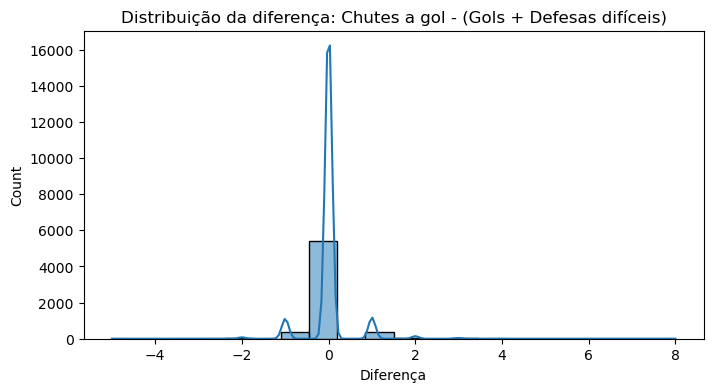

In [42]:
plt.figure(figsize=(8, 4))
sns.histplot(df_dd1['Diff'], bins=20, kde=True)
plt.title('Distribuição da diferença: Chutes a gol - (Gols + Defesas difíceis)')
plt.xlabel('Diferença')
plt.show()

## 4.2 - Defesas difíceis 2

In [43]:
mask_dd2 = df[['Chutes a gol 2', 'Gols 2', 'Defesas difíceis 1']].notna().all(axis=1)


# Depois, calcula a diferença entre Chutes a gol e (Gols + Defesas difíceis)
df_dd2 = df[mask_dd2].copy()
df_dd2['Diff'] = df_dd2['Chutes a gol 2'] - (df_dd2['Gols 2'] + df_dd2['Defesas difíceis 1'])

# Ver estatísticas dessa diferença
df_dd2['Diff'].describe()

count    6196.00000
mean        0.00581
std         0.39073
min        -5.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         4.00000
Name: Diff, dtype: float64

In [44]:
df_dd2['Diff'].value_counts().sort_index()

-5.0       1
-4.0       2
-3.0       1
-2.0      18
-1.0     296
 0.0    5545
 1.0     293
 2.0      31
 3.0       7
 4.0       2
Name: Diff, dtype: int64

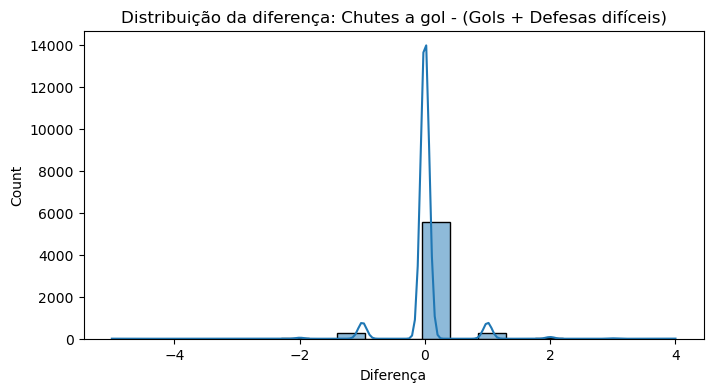

In [45]:
plt.figure(figsize=(8, 4))
sns.histplot(df_dd2['Diff'], bins=20, kde=True)
plt.title('Distribuição da diferença: Chutes a gol - (Gols + Defesas difíceis)')
plt.xlabel('Diferença')
plt.show()

Os resultados confirmam que a lógica **"Chutes a gol ≈ Gols + Defesas Difíceis"** se aplica à ampla maioria das partidas analisadas.

Mais de **90% dos jogos** apresentam uma correspondência exata entre essas variáveis, reforçando a consistência dos dados.

Desvios de até **±1** representam cerca de **5%** dos casos, o que ainda é perfeitamente aceitável dentro da margem de erro esperada em registros esportivos.

Já os desvios mais significativos (como **±3 ou mais**) são extremamente raros, ocorrendo em **menos de 1%** das partidas — o que reforça a confiabilidade dessa relação para possíveis imputações de dados ausentes.

In [46]:
# Imputando Defesas difíceis 1
mask_3 = (
    df['Defesas difíceis 1'].isna() &
    df['Chutes a gol 2'].notna() &
    df['Gols 2'].notna()
)
df.loc[mask_3, 'Defesas difíceis 1'] = df.loc[mask_3, 'Chutes a gol 2'] - df.loc[mask_3, 'Gols 2']

# Imputando Defesas difíceis 2
mask_4 = (
    df['Defesas difíceis 2'].isna() &
    df['Chutes a gol 1'].notna() &
    df['Gols 1'].notna()
)
df.loc[mask_4, 'Defesas difíceis 2'] = df.loc[mask_4, 'Chutes a gol 1'] - df.loc[mask_4, 'Gols 1']

In [47]:
df['Defesas difíceis 1'].value_counts().sort_index()

-5.0        2
-4.0        2
-3.0        7
-2.0       27
-1.0      189
 0.0     2767
 1.0     4416
 2.0     5314
 3.0     4658
 4.0     3471
 5.0     2103
 6.0     1157
 7.0      649
 8.0      318
 9.0      153
 10.0      74
 11.0      21
 12.0      12
 13.0      10
 14.0       4
 15.0       4
 16.0       1
 17.0       1
 19.0       1
 22.0       1
 30.0       1
Name: Defesas difíceis 1, dtype: int64

In [48]:
df['Defesas difíceis 2'].value_counts().sort_index()

-5.0        1
-4.0        1
-3.0       18
-2.0       44
-1.0      251
 0.0     2024
 1.0     3289
 2.0     4444
 3.0     4570
 4.0     3882
 5.0     2675
 6.0     1768
 7.0     1067
 8.0      636
 9.0      330
 10.0     154
 11.0     114
 12.0      43
 13.0      25
 14.0       9
 15.0       5
 16.0       3
 17.0       4
 18.0       2
 19.0       3
 21.0       1
Name: Defesas difíceis 2, dtype: int64

Vamos remover os resultados negativos para não comprometer o modelo. Isso significa remover 542 linhas de um total de 25390, o que representa 2% dos dados. 

In [49]:
df = df[(df['Defesas difíceis 1'] >= 0) & (df['Defesas difíceis 2'] >= 0)]

In [50]:
df.isnull().mean().sort_values(ascending=False)

Tratamentos 2          0.800611
Tratamentos 1          0.800611
Contra-ataques 1       0.751498
Contra-ataques 2       0.751498
Chutes bloqueados 2    0.648486
Chutes bloqueados 1    0.648486
Cruzamentos 1          0.642251
Cruzamentos 2          0.642251
Substituições 2        0.626885
Substituições 1        0.626885
Laterais 2             0.394513
Laterais 1             0.394513
Position 2             0.048107
Position 1             0.047102
Impedimentos 1         0.017940
Impedimentos 2         0.017940
Tiros-livres 2         0.007884
Tiros-livres 1         0.007884
Posse 2(%)             0.001126
Posse 1(%)             0.001126
Tiro de meta 1         0.000201
Escanteios 1           0.000201
Tiro de meta 2         0.000201
Escanteios 2           0.000201
Chutes fora 2          0.000201
Chutes fora 1          0.000201
Defesas difíceis 1     0.000000
Defesas difíceis 2     0.000000
Time 1                 0.000000
Time 2                 0.000000
Cartões vermelhos 2    0.000000
Cartões 

# 5 - Laterais

Nesta etapa, foi realizada uma análise detalhada dos histogramas dos dados relacionados aos laterais. O objetivo foi avaliar a distribuição dos dados e verificar a viabilidade de realizar uma imputação personalizada para cada time. A análise considerou a variabilidade das características dos laterais em diferentes contextos, buscando uma solução que refletisse melhor as particularidades de cada equipe.

<AxesSubplot:>

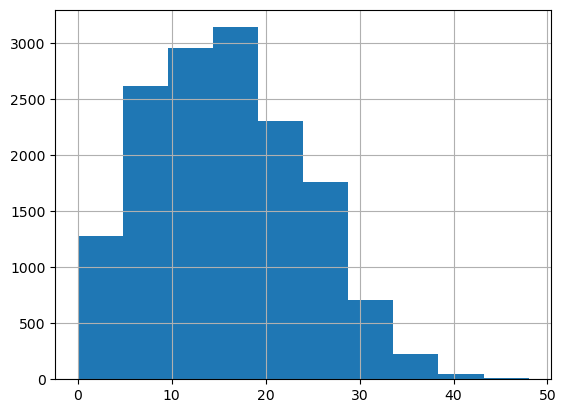

In [51]:
df['Laterais 1'].hist()

<AxesSubplot:>

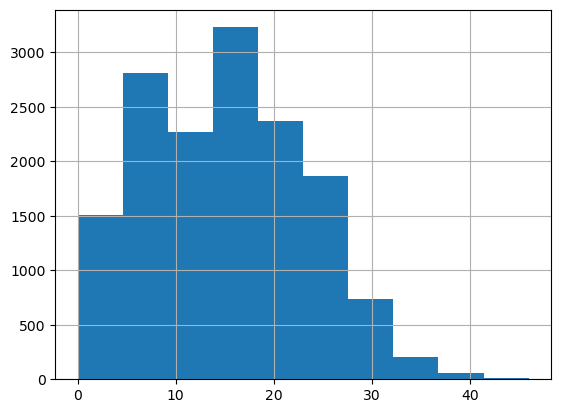

In [52]:
df['Laterais 2'].hist()

Tentar criar uma mediana por time

In [53]:
# Passo 1: Criar um DataFrame unificado com Time e Laterais
laterais_time1 = df[['Time 1', 'Laterais 1']].rename(columns={'Time 1': 'Time', 'Laterais 1': 'Laterais'})
laterais_time2 = df[['Time 2', 'Laterais 2']].rename(columns={'Time 2': 'Time', 'Laterais 2': 'Laterais'})

# Unir os dois em um único DataFrame
laterais_unificado = pd.concat([laterais_time1, laterais_time2], axis=0, ignore_index=True)

In [54]:
# Remover valores nulos
laterais_unificado = laterais_unificado.dropna()

In [55]:
# Calcular a mediana de laterais por time
mediana_por_time = laterais_unificado.groupby('Time')['Laterais'].median()

In [56]:
def imputar_laterais_1(row):
    if pd.isnull(row['Laterais 1']):
        if row['Time 1'] in mediana_por_time:
            return mediana_por_time[row['Time 1']]
        else:
            return np.nan  # Ou deixe assim para manter nulo
    return row['Laterais 1']

def imputar_laterais_2(row):
    if pd.isnull(row['Laterais 2']):
        if row['Time 2'] in mediana_por_time:
            return mediana_por_time[row['Time 2']]
        else:
            return np.nan
    return row['Laterais 2']

In [57]:
df[['Laterais 1','Laterais 2']].isnull().mean().sort_values(ascending=False)

Laterais 1    0.394513
Laterais 2    0.394513
dtype: float64

O número de valores faltantes permaneceu o mesmo, o que indica que essa estratégia não foi eficaz. Portanto, vamos continuar utilizando a imputação pela mediana geral.

In [58]:
mediana_global_1 = df['Laterais 1'].median()
mediana_global_2 = df['Laterais 2'].median()

df['Laterais 1'] = df['Laterais 1'].fillna(mediana_global_1)
df['Laterais 2'] = df['Laterais 2'].fillna(mediana_global_2)

In [59]:
# Verificação final
print("Nulos restantes:")
print(df[['Laterais 1', 'Laterais 2']].isnull().sum())

Nulos restantes:
Laterais 1    0
Laterais 2    0
dtype: int64


<AxesSubplot:>

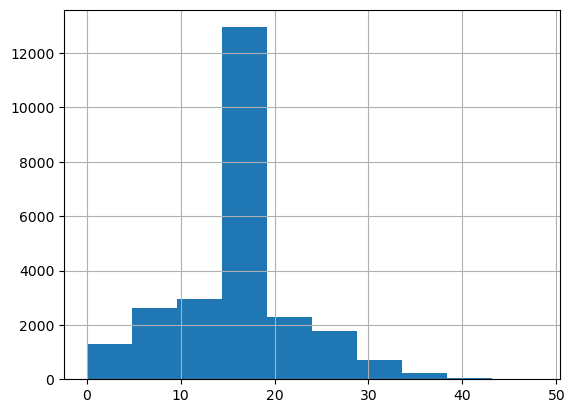

In [60]:
df['Laterais 1'].hist()

<AxesSubplot:>

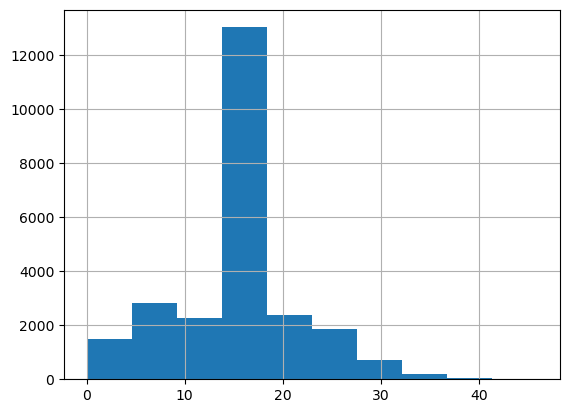

In [61]:
df['Laterais 2'].hist()

In [62]:
df.isnull().mean().sort_values(ascending=False)

Tratamentos 2          0.800611
Tratamentos 1          0.800611
Contra-ataques 1       0.751498
Contra-ataques 2       0.751498
Chutes bloqueados 2    0.648486
Chutes bloqueados 1    0.648486
Cruzamentos 1          0.642251
Cruzamentos 2          0.642251
Substituições 2        0.626885
Substituições 1        0.626885
Position 2             0.048107
Position 1             0.047102
Impedimentos 1         0.017940
Impedimentos 2         0.017940
Tiros-livres 2         0.007884
Tiros-livres 1         0.007884
Posse 2(%)             0.001126
Posse 1(%)             0.001126
Tiro de meta 2         0.000201
Escanteios 2           0.000201
Tiro de meta 1         0.000201
Chutes fora 2          0.000201
Chutes fora 1          0.000201
Escanteios 1           0.000201
Defesas difíceis 1     0.000000
Defesas difíceis 2     0.000000
Time 1                 0.000000
Time 2                 0.000000
Cartões amarelos 2     0.000000
Cartões vermelhos 1    0.000000
Gols 2                 0.000000
Gols 1  

# 6 - Substituições

<AxesSubplot:>

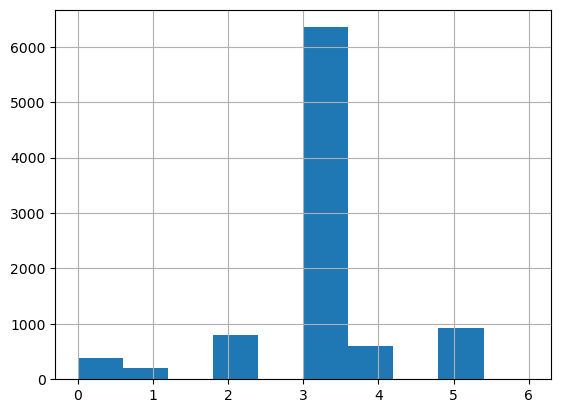

In [63]:
df['Substituições 1'].hist()

<AxesSubplot:>

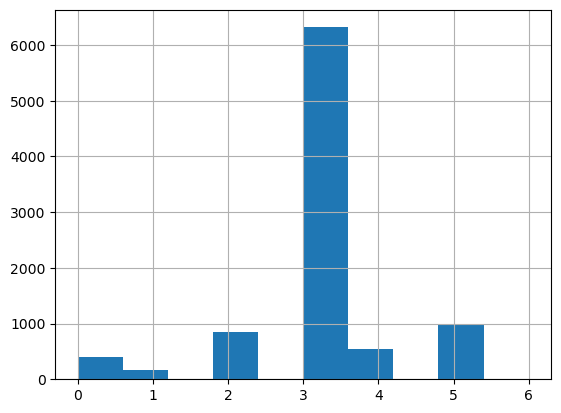

In [64]:
df['Substituições 2'].hist()

In [65]:
df['Substituições 1'].value_counts().sort_index()

0.0     386
1.0     207
2.0     798
3.0    6352
4.0     598
5.0     929
6.0       6
Name: Substituições 1, dtype: int64

In [66]:
df['Substituições 2'].value_counts().sort_index()

0.0     405
1.0     167
2.0     852
3.0    6318
4.0     551
5.0     976
6.0       7
Name: Substituições 2, dtype: int64

### Distribuição altamente concentrada
A moda de ambas as colunas é 3 substituições (mais de 6.300 ocorrências).

Casos com 0, 1 ou 2 substituições são minoritários.

* Alta correlação entre ‘Substituições 1’ e ‘Substituições 2’
Isso indica que, independentemente do resultado, ambos os times tendem a usar o mesmo número de substituições, o que limita o poder discriminativo da variável.

* Altíssima taxa de nulos (~62%)
Imputar dados tão ausentes aumenta o risco de inserir viés e de gerar uma variável que parece informativa, mas é artificial.

* Valor informacional fraco para o alvo
Não há evidência (teórica nem empírica) de que o número absoluto de substituições esteja fortemente correlacionado ao resultado final da partida.

Sem dados sobre quem foi substituído, por quem, em que momento, e em que contexto tático, a informação é pobre para inferência preditiva.

In [67]:
df = df.drop(columns=['Substituições 1', 'Substituições 2'])

In [68]:
df.isnull().mean().sort_values(ascending=False)

Tratamentos 2          0.800611
Tratamentos 1          0.800611
Contra-ataques 2       0.751498
Contra-ataques 1       0.751498
Chutes bloqueados 2    0.648486
Chutes bloqueados 1    0.648486
Cruzamentos 1          0.642251
Cruzamentos 2          0.642251
Position 2             0.048107
Position 1             0.047102
Impedimentos 2         0.017940
Impedimentos 1         0.017940
Tiros-livres 1         0.007884
Tiros-livres 2         0.007884
Posse 2(%)             0.001126
Posse 1(%)             0.001126
Escanteios 2           0.000201
Tiro de meta 2         0.000201
Tiro de meta 1         0.000201
Escanteios 1           0.000201
Chutes fora 1          0.000201
Chutes fora 2          0.000201
Defesas difíceis 1     0.000000
Defesas difíceis 2     0.000000
Time 1                 0.000000
Time 2                 0.000000
Faltas 2               0.000000
Gols 2                 0.000000
Cartões amarelos 1     0.000000
Gols 1                 0.000000
Chutes a gol 2         0.000000
Laterais

# 7 - Outras colunas  

**Tratamentos, contra-ataques, chutes bloqueados e cruzamentos**

Neste caso, não foi possível encontrar uma abordagem adequada para imputação direta nessas colunas. Elas apresentavam um número significativo de valores faltantes, o que poderia comprometer a integridade do conjunto de dados. Além disso, essas variáveis não apresentavam uma conexão clara com nossa variável alvo. Por essas razões, optou-se por remover essas colunas da análise.


In [69]:
df = df.drop(columns=['Tratamentos 1', 'Tratamentos 2','Contra-ataques 1','Contra-ataques 2','Chutes bloqueados 1',
                      'Chutes bloqueados 2','Cruzamentos 1','Cruzamentos 2'])

In [70]:
df.isnull().mean().sort_values(ascending=False)

Position 2             0.048107
Position 1             0.047102
Impedimentos 1         0.017940
Impedimentos 2         0.017940
Tiros-livres 1         0.007884
Tiros-livres 2         0.007884
Posse 1(%)             0.001126
Posse 2(%)             0.001126
Tiro de meta 1         0.000201
Tiro de meta 2         0.000201
Chutes fora 2          0.000201
Chutes fora 1          0.000201
Escanteios 2           0.000201
Escanteios 1           0.000201
Time 1                 0.000000
Defesas difíceis 2     0.000000
Defesas difíceis 1     0.000000
Time 2                 0.000000
Chutes a gol 1         0.000000
Gols 2                 0.000000
Gols 1                 0.000000
Chutes a gol 2         0.000000
Laterais 1             0.000000
Cartões vermelhos 2    0.000000
Cartões vermelhos 1    0.000000
Cartões amarelos 2     0.000000
Cartões amarelos 1     0.000000
Faltas 2               0.000000
Faltas 1               0.000000
Laterais 2             0.000000
dtype: float64

# 8 - Verificando a posse de bola

Foi realizada uma análise para verificar a presença de valores de posse de bola igual a 0% ou situações em que a soma das posses de bola ultrapassava 100%. Esse procedimento foi importante para garantir a consistência dos dados e identificar possíveis erros ou inconsistências nas informações registradas.

In [71]:
# Verifica se a soma das posses é exatamente 100
soma_posses = df['Posse 1(%)'] + df['Posse 2(%)']

soma_posses.value_counts()

100.0    24797
101.0       32
0.0          3
102.0        1
dtype: int64

In [72]:
# Verificar se tem posses de bola zero
df[(df['Posse 1(%)']==0) | (df['Posse 2(%)']==0)][['Posse 1(%)','Posse 2(%)']].value_counts()

Posse 1(%)  Posse 2(%)
100.0       0.0           7
0.0         100.0         6
            0.0           3
dtype: int64

In [73]:
# Filtra apenas as linhas onde onde a posse é 0%
df = df[(df['Posse 1(%)'] != 0) & (df['Posse 2(%)'] != 0)]

In [74]:
# Filtra apenas as linhas onde a soma é exatamente 100%
df = df[soma_posses == 100.0]

C:\Users\Yuri\AppData\Local\Temp\ipykernel_9976\1783054350.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[soma_posses == 100.0]


In [75]:
df.isnull().mean().sort_values(ascending=False)

Position 2             0.048257
Position 1             0.047248
Impedimentos 1         0.017834
Impedimentos 2         0.017834
Tiros-livres 1         0.007747
Tiros-livres 2         0.007747
Escanteios 1           0.000161
Escanteios 2           0.000161
Tiro de meta 1         0.000121
Tiro de meta 2         0.000121
Chutes fora 2          0.000121
Chutes fora 1          0.000121
Time 1                 0.000000
Posse 2(%)             0.000000
Posse 1(%)             0.000000
Defesas difíceis 2     0.000000
Defesas difíceis 1     0.000000
Time 2                 0.000000
Chutes a gol 1         0.000000
Gols 2                 0.000000
Gols 1                 0.000000
Chutes a gol 2         0.000000
Laterais 1             0.000000
Cartões vermelhos 2    0.000000
Cartões vermelhos 1    0.000000
Cartões amarelos 2     0.000000
Cartões amarelos 1     0.000000
Faltas 2               0.000000
Faltas 1               0.000000
Laterais 2             0.000000
dtype: float64

# 9 - Remoção de dados faltantes 

Agora a coluna com mais dados faltantes de 4%, então vamos remover essas linhas pois é uma parte pequena dos dados.

In [76]:
df_final = df.dropna(subset=['Position 1', 'Position 2','Impedimentos 1', 'Impedimentos 2','Escanteios 1', 
                                   'Escanteios 1', 'Tiro de meta 1', 'Tiro de meta 2', 'Chutes fora 1', 'Chutes fora 2'])

In [77]:
df_final.isnull().mean().sort_values(ascending=False)

Chutes a gol 1         0.0
Chutes a gol 2         0.0
Position 1             0.0
Time 2                 0.0
Time 1                 0.0
Posse 2(%)             0.0
Posse 1(%)             0.0
Defesas difíceis 2     0.0
Defesas difíceis 1     0.0
Tiros-livres 2         0.0
Tiros-livres 1         0.0
Tiro de meta 2         0.0
Tiro de meta 1         0.0
Gols 2                 0.0
Gols 1                 0.0
Laterais 2             0.0
Laterais 1             0.0
Cartões vermelhos 2    0.0
Cartões vermelhos 1    0.0
Cartões amarelos 2     0.0
Cartões amarelos 1     0.0
Faltas 2               0.0
Faltas 1               0.0
Chutes fora 2          0.0
Chutes fora 1          0.0
Escanteios 2           0.0
Escanteios 1           0.0
Impedimentos 2         0.0
Impedimentos 1         0.0
Position 2             0.0
dtype: float64

In [78]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22926 entries, 0 to 27714
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       22926 non-null  float64
 1   Chutes a gol 2       22926 non-null  float64
 2   Impedimentos 1       22926 non-null  float64
 3   Impedimentos 2       22926 non-null  float64
 4   Escanteios 1         22926 non-null  float64
 5   Escanteios 2         22926 non-null  float64
 6   Chutes fora 1        22926 non-null  float64
 7   Chutes fora 2        22926 non-null  float64
 8   Faltas 1             22926 non-null  float64
 9   Faltas 2             22926 non-null  float64
 10  Cartões amarelos 1   22926 non-null  float64
 11  Cartões amarelos 2   22926 non-null  float64
 12  Cartões vermelhos 1  22926 non-null  float64
 13  Cartões vermelhos 2  22926 non-null  float64
 14  Laterais 1           22926 non-null  float64
 15  Laterais 2           22926 non-null 

# 10 - Time

A coluna "time" estava armazenando informações do tipo string, representando o nome ou identificador das equipes. No entanto, para a construção do modelo preditivo, essa coluna não era relevante, pois não trazia uma informação numérica ou categórica que pudesse ser diretamente utilizada no processo de treinamento ou análise. Como o modelo requer variáveis quantitativas ou que possam ser convertidas em variáveis significativas para a predição, a coluna foi removida para evitar sobrecarregar o modelo com dados irrelevantes e garantir que o foco permanecesse nas variáveis com maior impacto no desempenho preditivo.

In [79]:
df_final = df_final.drop(['Time 1', 'Time 2'], axis=1)

In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22926 entries, 0 to 27714
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       22926 non-null  float64
 1   Chutes a gol 2       22926 non-null  float64
 2   Impedimentos 1       22926 non-null  float64
 3   Impedimentos 2       22926 non-null  float64
 4   Escanteios 1         22926 non-null  float64
 5   Escanteios 2         22926 non-null  float64
 6   Chutes fora 1        22926 non-null  float64
 7   Chutes fora 2        22926 non-null  float64
 8   Faltas 1             22926 non-null  float64
 9   Faltas 2             22926 non-null  float64
 10  Cartões amarelos 1   22926 non-null  float64
 11  Cartões amarelos 2   22926 non-null  float64
 12  Cartões vermelhos 1  22926 non-null  float64
 13  Cartões vermelhos 2  22926 non-null  float64
 14  Laterais 1           22926 non-null  float64
 15  Laterais 2           22926 non-null 

In [81]:
# Teste 
df_final2 = df_final.drop(['Position 1', 'Position 2'], axis=1)

# 11 - Position

Nesta seção, foi realizada uma separação das escalações das equipes com base nas posições dos jogadores. Utilizamos a função `pd.get_dummies()` para criar variáveis binárias para as posições dos jogadores, resultando em dois novos DataFrames:

- `positions_1`: Representa as posições dos jogadores da "Position 1" com variáveis binárias prefixadas com 'P1'.
- `positions_2`: Representa as posições dos jogadores da "Position 2" com variáveis binárias prefixadas com 'P2'.

Essas variáveis indicam a presença de cada posição específica nas escalações, transformando as informações em formato adequado para modelagem preditiva. A partir desse ponto, seria possível combinar essas variáveis com o restante dos dados e testar se as informações das posições impactam diretamente na previsão do resultado da partida (vitória, derrota ou empate).

In [82]:
positions_1 = pd.get_dummies(df_final['Position 1'], prefix='P1')
positions_2 = pd.get_dummies(df_final['Position 2'], prefix='P2')

In [83]:
df_final = pd.concat([df_final, positions_1, positions_2], axis=1)

In [84]:
df_final = df_final.drop(['Position 1', 'Position 2'], axis=1)

# 11 - Criando variável alvo

Nesta seção, foi criada a variável alvo que representa o resultado da partida: vitória, empate ou derrota. Para isso, foi implementada a função que compara os gols dos dois times e atribui um valor numérico com base no resultado:

- **1** para vitória do Time 1 (quando 'Gols 1' > 'Gols 2')
- **-1** para vitória do Time 2 (quando 'Gols 1' < 'Gols 2')
- **0** para empate (quando 'Gols 1' == 'Gols 2')

A função foi aplicada a cada linha do DataFrame `df_final` e também ao `df_final2`, criando a coluna 'Resultado' em ambos os DataFrames com os respectivos valores para cada partida. Essa coluna será usada como variável dependente (target) nos modelos preditivos, representando o resultado da partida (vitória, empate ou derrota) de maneira numérica.

In [85]:
def get_result_numeric(row):
    return 1 if row['Gols 1'] > row['Gols 2'] else (-1 if row['Gols 1'] < row['Gols 2'] else 0)

df_final['Resultado'] = df_final.apply(get_result_numeric, axis=1)
df_final2['Resultado'] = df_final.apply(get_result_numeric, axis=1)

In [86]:
df_final['Resultado'].value_counts()

 1    10306
-1     6802
 0     5818
Name: Resultado, dtype: int64

# 12 - Treinamento

Nesta etapa, foi realizado o treinamento de três modelos preditivos para avaliar o impacto das variáveis na previsão do resultado da partida. O processo seguiu os seguintes passos:

1. **Definição das variáveis independentes (X) e dependentes (y)**:
   - **X**: Contém todas as variáveis independentes do modelo, excluindo a coluna 'Resultado' (variável alvo) e as colunas 'Gols 1' e 'Gols 2' (não utilizadas diretamente para a predição).
   - **y**: Contém a variável dependente 'Resultado', que indica a vitória, derrota ou empate.

2. **Divisão do conjunto de dados**:
   - Os dados foram divididos em conjuntos de treinamento (70%) e teste (30%) utilizando a função `train_test_split`, com a opção `stratify=y` para garantir que as classes (vitória, empate, derrota) estivessem equilibradas em ambas as divisões.

3. **Treinamento dos modelos**:
   Foram treinados três modelos diferentes:
   - **Random Forest**: Um modelo de árvore de decisão que utiliza múltiplas árvores para melhorar a precisão.
   - **Gradient Boosting**: Um modelo de boosting que constrói árvores sequenciais, corrigindo os erros das anteriores.
   - **Logistic Regression**: Um modelo linear que estima a probabilidade de ocorrência de cada classe.

4. **Avaliação dos modelos**:
   Para cada modelo, foi gerado um relatório de classificação usando a função `classification_report`, que fornece métricas como precisão, recall, f1-score e suporte. Também foi calculada a acurácia de cada modelo usando a função `accuracy_score`.

5. **Comparação de Acurácia**:
   - A acurácia de cada modelo foi impressa para facilitar a comparação do desempenho entre os métodos.

Além disso, vale ressaltar que o DataFrame utilizado para o treinamento não incluiu as variáveis relacionadas às posições dos jogadores, pois essas não demonstraram impacto significativo nos resultados, conforme observado em etapas anteriores.

A seguir, são apresentados os resultados dos modelos e suas respectivas métricas de desempenho.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [88]:
# Define X e y
X = df_final2.drop(columns=['Resultado', 'Gols 1', 'Gols 2']) #['Chutes a gol 1', 'Defesas difíceis 1', 'Chutes a gol 2', 'Defesas difíceis 2']
y = df_final2['Resultado']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 2: Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Model 3: Logistic Regression
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
print("Random Forest Metrics:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting Metrics:")
print(classification_report(y_test, y_pred_gb))

print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_lr))

# Accuracy Comparison
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"Random Forest Accuracy: {acc_rf:.2%}")
print(f"Gradient Boosting Accuracy: {acc_gb:.2%}")
print(f"Logistic Regression Accuracy: {acc_lr:.2%}")

Random Forest Metrics:
              precision    recall  f1-score   support

          -1       0.75      0.80      0.78      2041
           0       0.67      0.34      0.45      1745
           1       0.76      0.93      0.84      3092

    accuracy                           0.74      6878
   macro avg       0.73      0.69      0.69      6878
weighted avg       0.73      0.74      0.72      6878

Gradient Boosting Metrics:
              precision    recall  f1-score   support

          -1       0.91      0.92      0.92      2041
           0       0.85      0.67      0.75      1745
           1       0.87      0.97      0.92      3092

    accuracy                           0.88      6878
   macro avg       0.88      0.86      0.86      6878
weighted avg       0.88      0.88      0.88      6878

Logistic Regression Metrics:
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98      2041
           0       0.96      0.95      0.95      1

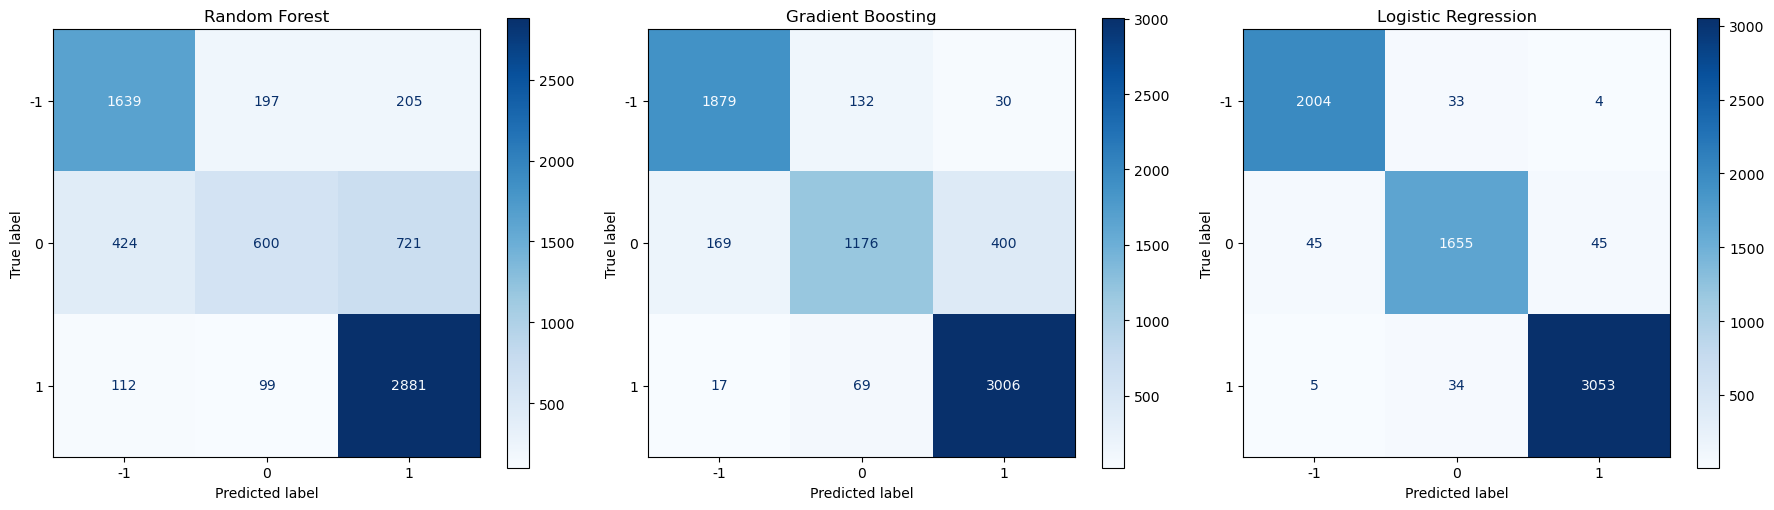

In [89]:
# Lista de modelos e seus respectivos nomes e predições
modelos = {
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Logistic Regression': y_pred_lr
}

# Plotando as matrizes de confusão
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # uma linha, três colunas

for ax, (nome_modelo, y_pred) in zip(axes, modelos.items()):
    cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f'{nome_modelo}')

plt.tight_layout()
plt.show()

# 13 - Verificando Overfitting

Para avaliar se o modelo de Regressão Logística estava sofrendo com overfitting, foi aplicada a técnica de **validação cruzada (cross-validation)**.

Utilizamos a função `cross_val_score` com os seguintes parâmetros:
- **Modelo**: `lr_model`, o modelo de Regressão Logística treinado anteriormente.
- **X e y**: Conjunto completo de variáveis independentes e a variável alvo.
- **cv=5**: O número de *folds* definido foi 5, ou seja, os dados foram divididos em 5 subconjuntos. Em cada iteração, 4 partes são usadas para treino e 1 para teste, alternando entre elas.
- **scoring='accuracy'**: A métrica utilizada para avaliação foi a acurácia.

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f"Acurácias por fold: {scores}")
print(f"Acurácia média: {scores.mean():.2%}")


Acurácias por fold: [0.99890973 0.97033806 0.97491821 0.9740458  0.96728462]
Acurácia média: 97.71%


Os resultados mostram que o modelo apresentou **alta acurácia em todos os subconjuntos**, com uma variação pequena entre os *folds*. A acurácia média de **97.71%** reforça que o modelo está performando de forma estável e consistente, sem indícios evidentes de **overfitting**.

A baixa variabilidade entre os *folds* indica que o modelo consegue generalizar bem, mesmo quando treinado e testado em diferentes subconjuntos dos dados. Assim, a Regressão Logística se mostrou um modelo promissor para o problema, mantendo desempenho elevado sem depender excessivamente do conjunto de treino original.

# 14 - Análise das Features Mais Importantes

Após o treinamento dos modelos, foi realizada uma análise das **variáveis (features)** que mais contribuíram para a predição de cada classe de resultado: **vitória do Time 1**, **empate** e **vitória do Time 2**.

Para isso, foi gerado um gráfico de barras com os coeficientes da Regressão Logística, que indicam o peso (influência) de cada variável na probabilidade de ocorrência de cada classe. 

Essa visualização permite **entender quais características do jogo têm maior impacto na previsão do modelo**, ajudando na interpretação dos resultados e possibilitando insights para futuras melhorias no modelo ou análise de partidas.

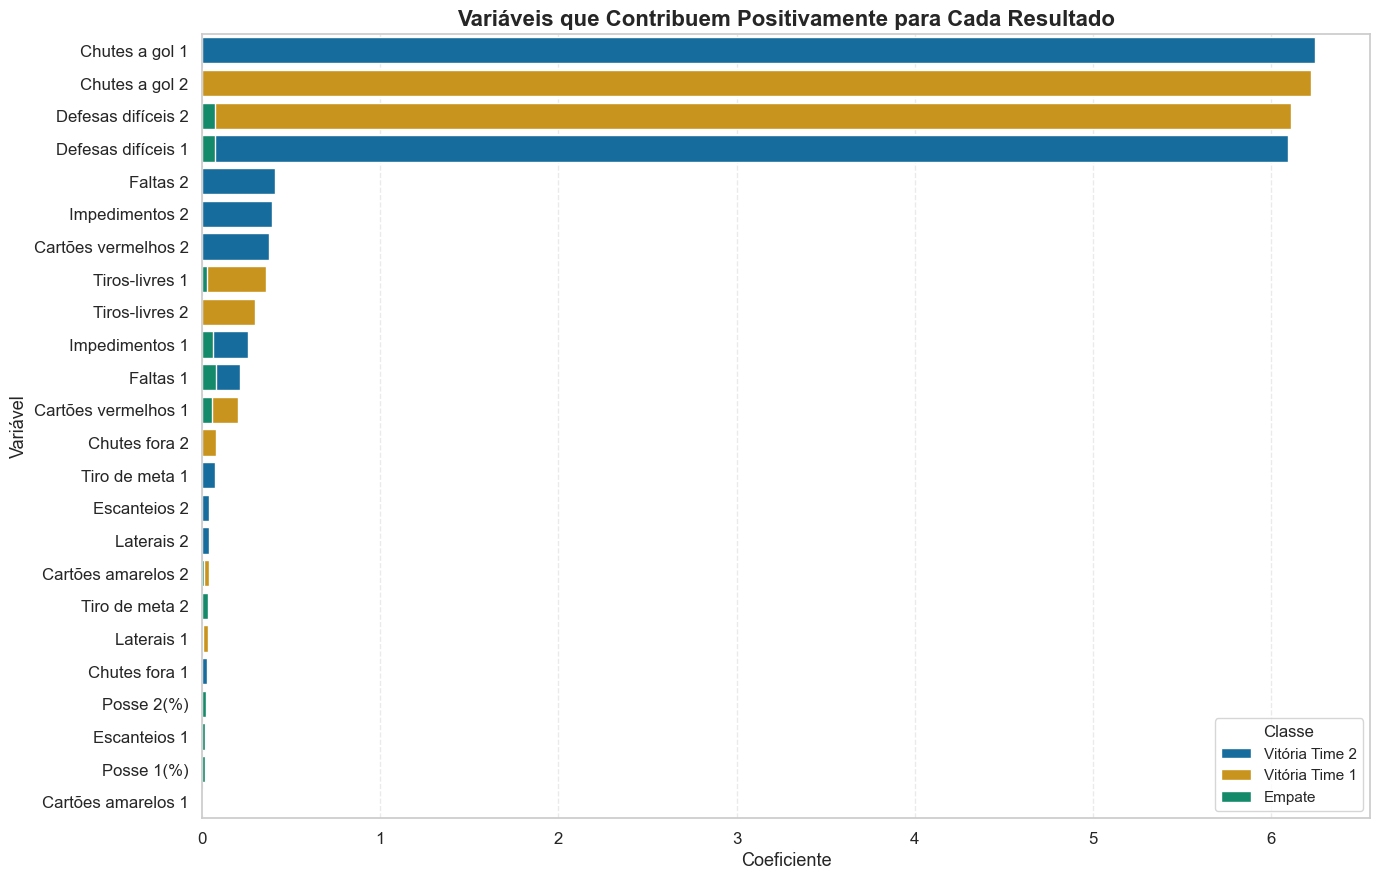

In [91]:
classes = ['Vitória Time 1', 'Empate', 'Vitória Time 2']
coef = lr_model.coef_  # shape: (3, n_features)
features = X.columns

# DataFrame com coeficientes
df_coef = pd.DataFrame(coef.T, columns=classes, index=features)

# Só coeficientes positivos
df_coef_pos = df_coef[df_coef > 0].dropna(how='all')

# long format
df_melt = df_coef_pos.reset_index().melt(id_vars='index', var_name='Classe', value_name='Coeficiente')
df_melt = df_melt.dropna()
df_melt = df_melt.sort_values(by='Coeficiente', ascending=False)

sns.set(style='whitegrid', context='notebook', font_scale=1.1)
palette = {
    'Vitória Time 1': '#E69F00',  # laranja
    'Empate': '#009E73',          # verde
    'Vitória Time 2': '#0072B2'   # azul
}
plt.figure(figsize=(14, 9))
sns.barplot(
    data=df_melt,
    y='index',
    x='Coeficiente',
    hue='Classe',
    dodge=False,
    palette=palette
)
# Ajustes 
plt.xlabel('Coeficiente', fontsize=13)
plt.ylabel('Variável', fontsize=13)
plt.title('Variáveis que Contribuem Positivamente para Cada Resultado', fontsize=16, weight='bold')
plt.legend(title='Classe', fontsize=11, title_fontsize=12, loc='lower right')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.show()

### Variáveis com Maior Impacto

A análise dos coeficientes revelou que **"Chutes a gol"** e **"Defesas difíceis"** estão entre as variáveis mais influentes para prever o resultado de uma partida. Esse resultado é coerente com a dinâmica do jogo: um maior número de finalizações e defesas indica uma atuação ofensiva e defensiva intensa, o que naturalmente se reflete no desfecho da partida.

A **direção dos coeficientes também é intuitiva**. Por exemplo, a variável **"Chutes a gol 1"** aparece como um forte preditor positivo para **vitória do Time 1**, o que reforça a interpretação de que um maior volume ofensivo tende a levar ao sucesso no placar.

Por outro lado, os coeficientes associados à classe **empate** são consideravelmente menores em magnitude, o que também faz sentido: empates costumam ocorrer em jogos mais equilibrados, onde não há um domínio claro de um dos lados, e portanto, os sinais estatísticos são mais sutis e distribuídos entre os times.

# Salvando o Modelo

In [92]:
# import joblib

# joblib.dump(lr_model, 'modelo_regressao_logistica.pkl')